In [1]:
import pandas as pd
import sqlite3

In [2]:
connection = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
commits_query = """
SELECT uid,
    DATE(timestamp) AS date,
    CASE
        WHEN TIME(timestamp) BETWEEN '00:00:00' AND '03:59:59' THEN 'night'
        WHEN TIME(timestamp) BETWEEN '04:00:00' AND '09:59:59' THEN 'morning'
        WHEN TIME(timestamp) BETWEEN '10:00:00' AND '16:59:59' THEN 'afternoon'
        WHEN TIME(timestamp) BETWEEN '17:00:00' AND '23:59:59' THEN 'evening'
    END AS time_period,
    COUNT(*) AS commits_count
FROM checker
WHERE uid LIKE 'user_%'
GROUP BY date, time_period
ORDER BY date, time_period;
"""
commits_data = pd.read_sql_query(commits_query, connection)
commits_data.head()

,uid,date,time_period,commits_count
0,user_4,2020-04-17,afternoon,10
1,user_4,2020-04-17,morning,13
2,user_30,2020-04-18,afternoon,33
3,user_12,2020-04-18,evening,35
4,user_17,2020-04-18,morning,1


In [4]:
commits_per_period = commits_data.pivot(index='date', columns='time_period', values='commits_count').fillna(0)

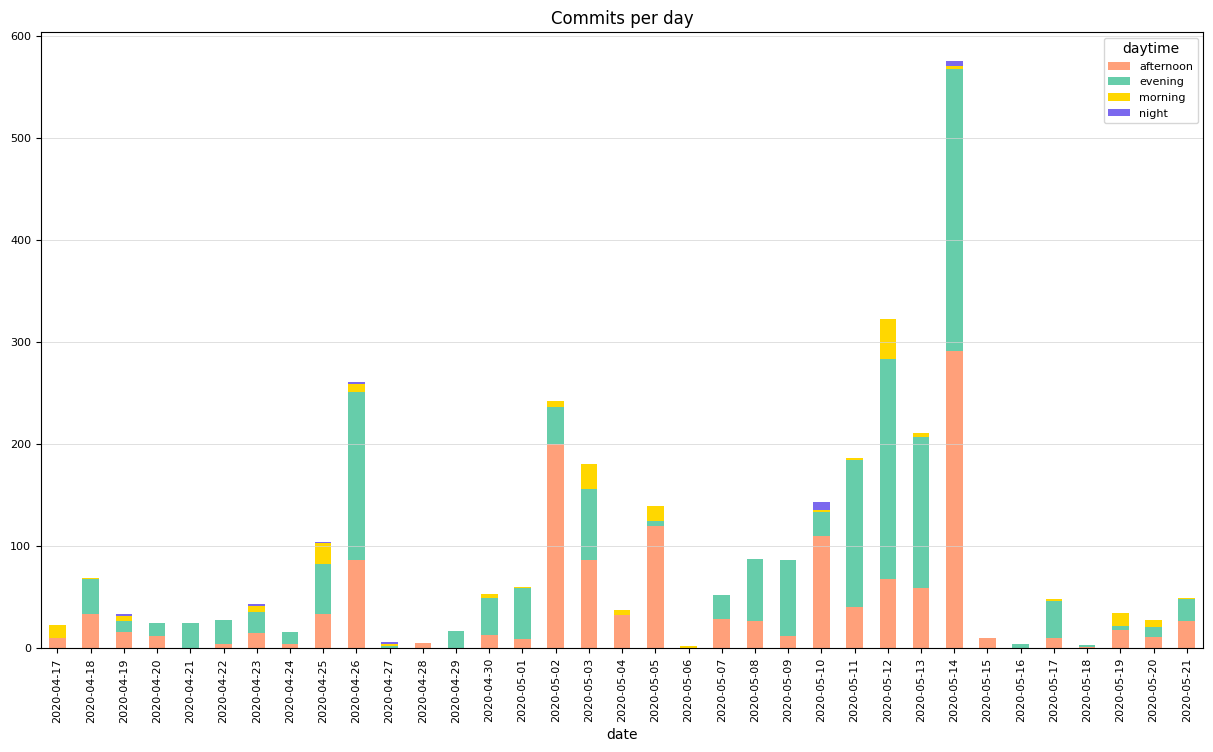

In [5]:
palette = {
    "morning": "gold",
    "evening": "mediumaquamarine",
    "afternoon": "lightsalmon",
    "night": "mediumslateblue",
}

ax = commits_per_period.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    color=palette
)

ax.set_title('Commits per day', fontsize=12)
ax.set_xlabel('date', fontsize=10)
ax.tick_params(axis='x', labelrotation=90, labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.legend(title='daytime', fontsize=8)

ax.grid(visible=True, which='major', axis='y', color='lightgrey', linestyle='-', linewidth=0.5)

### When do our users usually commit the labs: in the night, morning, afternoon,or evening?

* The two most common periods are: afternoon and evening.

### Which day has:
### the most number of commits and at the same time, the number of commits in the evening is higher than in the afternoon?

* 2020-05-12